In [ ]:
## Simulation von Daten anhand von Startparametern,
# Speichern und Aufrufen der Daten

# rüberkopieren in analysis (simulations-fkt. und laod_data fkt.) und den Rest löschen

## Simulation File
For the belowed functions are following python-libraries requiered:
<b> numpy, matplotlib, pickle, import_ipynb, typing, collections</b> and <b> functools</b>. They allowes to working on ndarrays, making visualisations, working with functions . <br>
Own functions from the files  <b>rk4.ipynb, awareness.ipynb</b> and <b> plots.ipynb</b> are used as well.

This file is used to simulate the data based on parameters.
The data is loaded from the stored files and  further manipulated.
Detaild aspects and code-design decisions are being explained in the functions itself.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import import_ipynb


In [ ]:
from typing import Union
from collections.abc import Callable
from functools import partial

from rk4 import rk4
from awareness import susceptibility, g2, awareness_SIR
from plots import plot_awareness, plot_analysis

importing Jupyter notebook from rk4.ipynb
importing Jupyter notebook from awareness.ipynb
importing Jupyter notebook from plots.ipynb


In [ ]:
"""
data structure  data[i, j, k, m],
with i and j describing the place on the grid,
k=S,I,R and m=x0, x1, x2, ... (awareness)
"""

'\ndata structure  data[i, j, k, m],\nwith i and j describing the place on the grid,\nk=S,I,R and m=x0, x1, x2, ... (awareness)\n'

In [ ]:
def save_data(data, fname):
    with open(fname, "wb+") as f:
        pickle.dump(data, f)

In [ ]:
def simulate_rk4(model: Callable[[float, np.ndarray], np.ndarray], y0: np.ndarray, params: dict, tmax: float, dt: float=0.1, fname='test_data.txt')->None:
    n = int(tmax/dt)
    print(params)
    p_model = partial(model, **params)
    t, y = rk4(p_model, y0, 0, tmax, n)
    data = (t, y)
    save_data(data, fname)
    
    


In [ ]:
if __name__ == '__main__':


    y0 = np.zeros(shape=(30,30,3,5))  # start parameters,
                                    # size determines grid size and number of information compartments
    #print(y0)
    y0[:,:,0,-1] = 1  # everyone is susceptible, no information at the start


    y0[14, 14, 1, -1] = 1  # one infection
    y0[14, 14, 0, -1] = 0  # remove infected from susceptible pool


    # to replicate information plot use instead:
    #y0 = np.zeros(shape=(30,30,3,5))
    #y0[:,:,0,-1] = 1  # everyone is susceptible, no information at the start
    #y0[14, 14, 0, 0] = 1  # one information
    #y0[14, 14, 0, -1] = 0  # remove spot with no information


    # model
    # alpha: awareness transmission
    # beta: virus transmission
    # gamma: virus recovery rate
    # omega: awareness creation
    # lam: awareness fading over time
    # rho: susceptibility reduction (rh0=0.9 means 90% reduction for first level, 81% reduction for second level etc.)

    parameters = dict(alpha=5, beta=0.25, gamma=0.2, omega=0.4, lam=0.5, rho=0.7, kappa=1)
    tmax = 10
    dt = 0.1

    simulate_rk4(awareness_SIR, y0, parameters, tmax, dt)



{'alpha': 5, 'beta': 0.25, 'gamma': 0.2, 'omega': 0.4, 'lam': 0.5, 'rho': 0.7, 'kappa': 1}


In [ ]:
def load_data(fname):
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    t, y = data
    return t, y


In [ ]:
if __name__ == '__main__':
    model = partial(awareness_SIR, **parameters)
    print(parameters)
    #model = partial(awareness_SIR, alpha=5, beta=0.25, gamma=0.2, omega=0.4, lam=10, rho=RHO)


    t_old, y_old = rk4(model,y0, 0, tmax, 10*tmax)
    #t,y = rk4(model,y0,0,2,100)


{'alpha': 5, 'beta': 0.25, 'gamma': 0.2, 'omega': 0.4, 'lam': 0.5, 'rho': 0.7, 'kappa': 1}


In [ ]:
if __name__ == '__main__':
    t_new, y_new = load_data('test_data.txt')

In [ ]:
if __name__ == '__main__':
    new = False
    if new:
        t, y = t_new, y_new
    else:
        t, y, = t_old, y_old

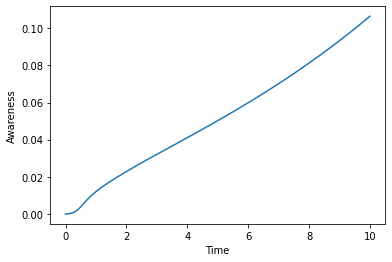

probability conserved: True


AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

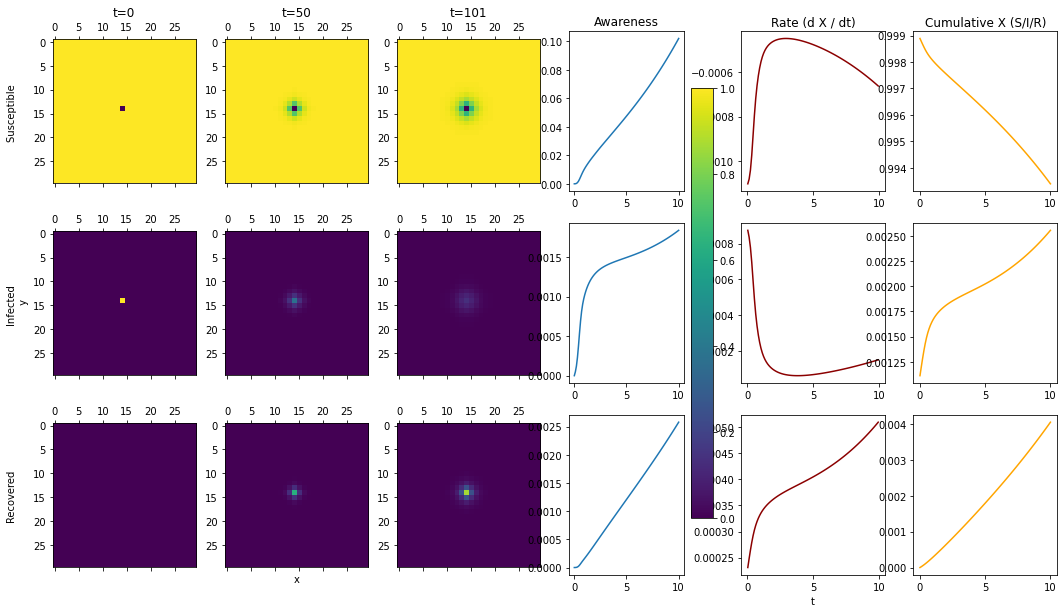

In [ ]:
if __name__ == '__main__':
    plot_awareness(y,t,parameters,"awareness_plot.png")
    plot_analysis(y,t,parameters,"analysis_plot.png")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>